In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
FREQS = ['1500', '2200', '2500']
FOLDER = 'ω tested at @ MHz'
FILE = 'ω optimized for @ MHz'

In [3]:
power_df = pd.DataFrame()
ipc_df = pd.DataFrame()
freq_df = pd.DataFrame()

for folder in FREQS:
    for freq in FREQS:
        df = pd.read_csv(f'{folder}/{freq}.csv')
        get_float = lambda metric: float(df[df['metric'] == metric]['average'])
        power_df = power_df.append({FOLDER: folder, FILE: freq, 'value': get_float('metricq')}, ignore_index=True)
        ipc_df = ipc_df.append({FOLDER: folder, FILE: freq, 'value': get_float('perf-ipc')*2}, ignore_index=True)
        freq_df = freq_df.append({FOLDER: folder, FILE: freq, 'value': get_float('perf-freq')*1000}, ignore_index=True)

power_df = power_df.pivot(FILE, FOLDER, 'value')
ipc_df = ipc_df.pivot(FILE, FOLDER, 'value')
freq_df = freq_df.pivot(FILE, FOLDER, 'value')

In [4]:
plt.rcParams.update({'font.size': 18})
sns.set_style("ticks")

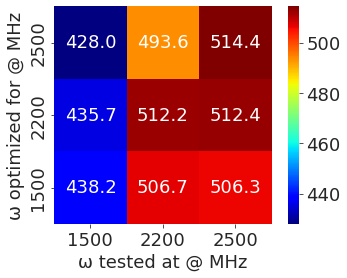

In [5]:
p1 = sns.heatmap(power_df, annot=True, square=True, fmt=".1f", cmap='jet')
p1.invert_yaxis()
[ tick.label1.set_verticalalignment('center') for tick in p1.yaxis.get_major_ticks() ]
plt.savefig('../../paper/fig/conway_pstate_comparison_power.pdf', bbox_inches='tight', pad_inches=0)

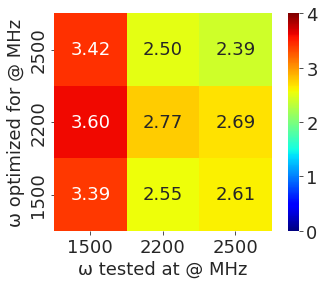

In [6]:
p2 = sns.heatmap(ipc_df, annot=True, square=True, fmt=".2f", cmap='jet', vmin=0, vmax=4)
p2.invert_yaxis()
[ tick.label1.set_verticalalignment('center') for tick in p2.yaxis.get_major_ticks() ]
plt.savefig('../../paper/fig/conway_pstate_comparison_ipc.pdf', bbox_inches='tight', pad_inches=0)

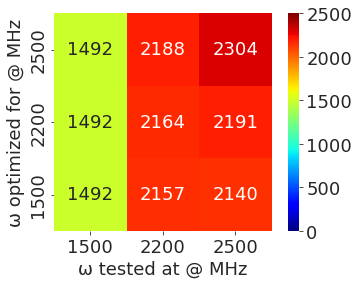

In [7]:
p3 = sns.heatmap(freq_df, annot=True, square=True, fmt=".0f", cmap='jet', vmin=0, vmax=2500)
p3.invert_yaxis()
[ tick.label1.set_verticalalignment('center') for tick in p3.yaxis.get_major_ticks() ]
plt.savefig('../../paper/fig/conway_pstate_comparison_freq.pdf', bbox_inches='tight', pad_inches=0)